In [ ]:
import pandas as pd


file_path = 'y_posts.csv'
data = pd.read_csv(file_path)
data.head()


,UserID,PostID,Age,Country,Followers,PostType,PostHour,PostWeekday,Likes,Shares,Comments,EngagementScore
0,997,0,21,Canada,67,Text,22,Monday,21,4,2,0.447761
1,48,1,47,Canada,407,Video,18,Monday,20,5,4,0.105651
2,301,2,18,USA,174,Text,17,Monday,18,8,4,0.252874
3,880,3,22,UK,53,Video,6,Monday,116,7,10,3.056604
4,189,4,31,France,3,Text,8,Monday,24,5,1,11.666667


Аналізуємо розподіл та корреляції

          UserID       PostID         Age    Followers     PostHour  \
count  5000.0000  5000.000000  5000.00000  5000.000000  5000.000000   
mean    503.7098  2499.500000    34.01800   205.586600    11.762000   
std     288.4307  1443.520003     9.59565   203.580275     6.937505   
min       0.0000     0.000000    18.00000     2.000000     0.000000   
25%     252.0000  1249.750000    25.00000    61.000000     6.000000   
50%     502.0000  2499.500000    34.00000   149.000000    12.000000   
75%     756.0000  3749.250000    43.00000   277.250000    18.000000   
max     999.0000  4999.000000    49.00000  1490.000000    23.000000   

             Likes       Shares     Comments  EngagementScore  
count  5000.000000  5000.000000  5000.000000      5000.000000  
mean     28.977600     4.965400    15.295200         1.547303  
std      27.176946     2.245353    21.652303         4.254233  
min       7.000000     0.000000     0.000000         0.017450  
25%      17.000000     3.000000     2.00

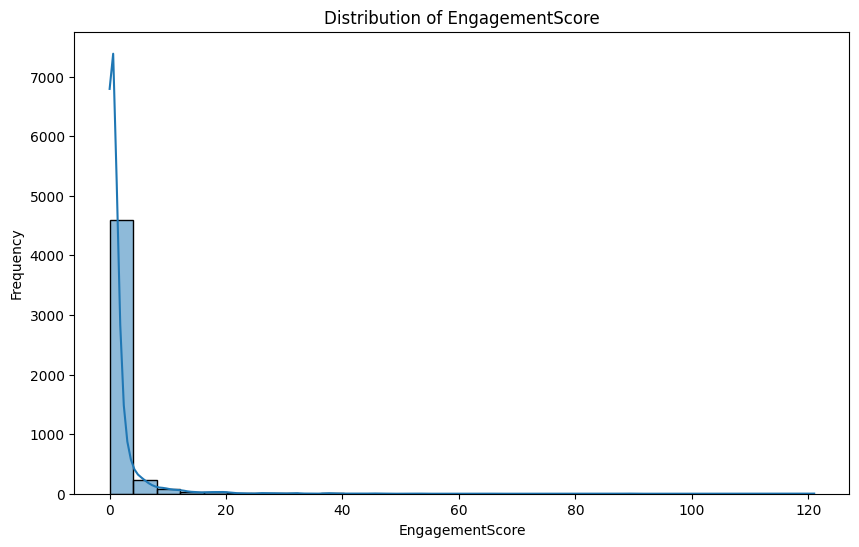

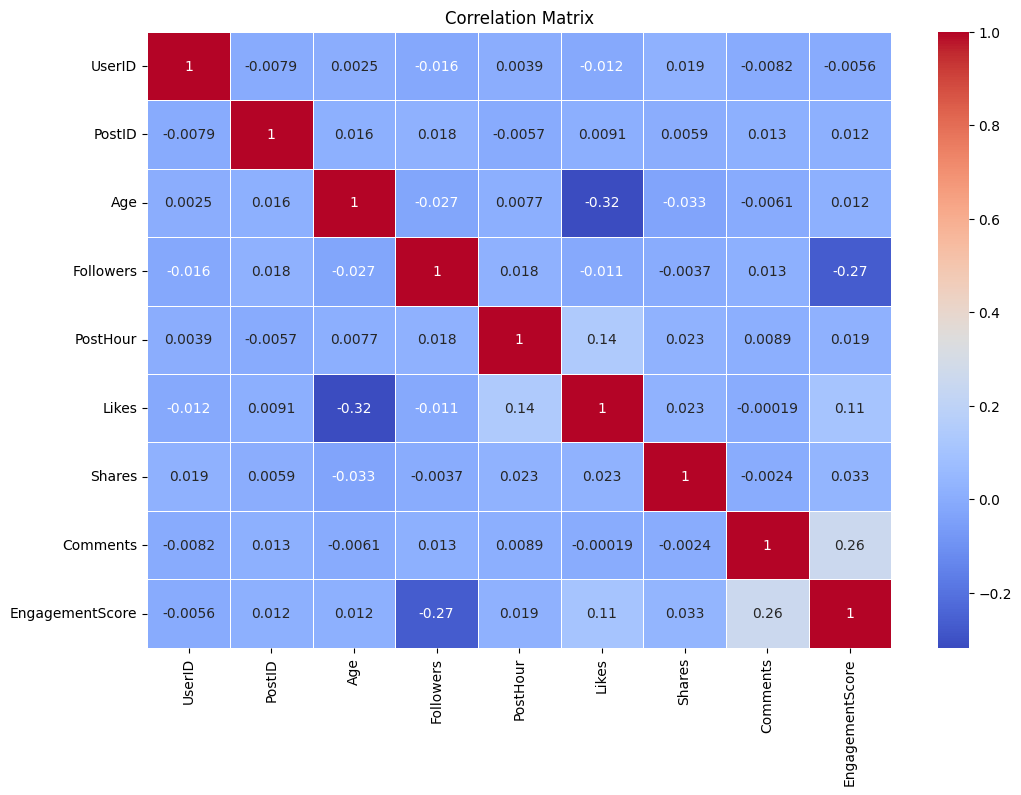

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


print(data.describe())


print(data.isnull().sum())

# Distribution of EngagementScore
plt.figure(figsize=(10, 6))
sns.histplot(data['EngagementScore'], bins=30, kde=True)
plt.title('Distribution of EngagementScore')
plt.xlabel('EngagementScore')
plt.ylabel('Frequency')
plt.show()


categorical_features = ['Country', 'PostType', 'PostWeekday']
numeric_data = data.drop(columns=categorical_features)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Побудуємо звичайну модель Лінійної Регресії

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Вибір ознак та цільової змінної
features = ['Age', 'Country', 'Followers', 'PostType', 'PostHour', 'PostWeekday', 'Likes', 'Shares', 'Comments']
target = 'EngagementScore'

# Розділення даних на навчальну та тестову вибірки
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding для категоріальних змінних
categorical_features = ['Country', 'PostType', 'PostWeekday']
numeric_features = ['Age', 'Followers', 'PostHour', 'Likes', 'Shares', 'Comments']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Побудова пайплайну
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(7.8913144631021455, 0.215374226027919)

Спробуємо модель GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Вибір ознак та цільової змінної
features = ['Age', 'Country', 'Followers', 'PostType', 'PostHour', 'PostWeekday', 'Likes', 'Shares', 'Comments']
target = 'EngagementScore'

# Розділення даних на навчальну та тестову вибірки
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding для категоріальних змінних
categorical_features = ['Country', 'PostType', 'PostWeekday']
numeric_features = ['Age', 'Followers', 'PostHour', 'Likes', 'Shares', 'Comments']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Побудова пайплайну
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.07764871380115816, 0.9922794633962388)

Так як модель показла себе як дуже продуктивну, спробуємо налаштувати параметри, щоб покращити результати прогнозування

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Вибір ознак та цільової змінної
features = ['Age', 'Country', 'Followers', 'PostType', 'PostHour', 'PostWeekday', 'Likes', 'Shares', 'Comments']
target = 'EngagementScore'

# Розділення даних на навчальну та тестову вибірки
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding для категоріальних змінних
categorical_features = ['Country', 'PostType', 'PostWeekday']
numeric_features = ['Age', 'Followers', 'PostHour', 'Likes', 'Shares', 'Comments']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Побудова пайплайну
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Визначення сітки параметрів для налаштування
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

# Налаштування моделі за допомогою GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Найкращі параметри
best_params = grid_search.best_params_

# Найкраща модель
best_model = grid_search.best_estimator_

# Прогнозування на тестовій вибірці
y_pred = best_model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, mse, r2


({'regressor__learning_rate': 0.2,
  'regressor__max_depth': 3,
  'regressor__min_samples_leaf': 1,
  'regressor__min_samples_split': 10,
  'regressor__n_estimators': 300,
  'regressor__subsample': 1.0},
 0.05777943852321589,
 0.9942550462431922)

В результаті отримуємо MSE = 0.0577, R^2 = 0.9942
